### Feature Importance

In [1]:
# importiing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
from sklearn.datasets import load_boston

In [4]:
boston =  load_boston()
ds  = pd.DataFrame(boston.data, columns = boston.feature_names)
ds['MEDV'] = boston.target
ds.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [8]:
# Revisiting Feature Importance
 # Which Feature Importance
 # or  all are equally important

# According to adaboost

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor

X = ds.drop('MEDV', axis = 1)
y = ds['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

ada = AdaBoostRegressor(n_estimators = 100, random_state = 0)
ada.fit(X_train, y_train)


AdaBoostRegressor(n_estimators=100, random_state=0)

In [9]:
ada.feature_importances_

array([0.0240206 , 0.0059237 , 0.00525022, 0.00303323, 0.03883194,
       0.24253101, 0.00823866, 0.13945528, 0.00816306, 0.0187668 ,
       0.05260894, 0.02205337, 0.43112319])

In [14]:
columns = X.columns
columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [24]:
result = pd.DataFrame(ada.feature_importances_ ,columns).sort_values(by = 0, ascending = False)

result


,0
LSTAT,0.431123
RM,0.242531
DIS,0.139455
PTRATIO,0.052609
NOX,0.038832
CRIM,0.024021
B,0.022053
TAX,0.018767
AGE,0.008239
RAD,0.008163


<AxesSubplot:title={'center':'Feature Importance'}>

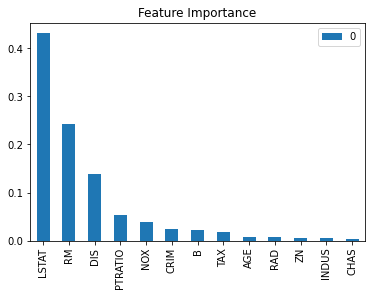

In [25]:
result.plot(kind = 'bar', title = 'Feature Importance')